# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

### Notes

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept NaNs. There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [1]:
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/'
                 'datasets/master/Ames%20Housing%20Data/train.csv',
                index_col=0)

print(df.shape)

(1460, 80)


In [3]:
pd.options.display.max_rows = 80
pd.options.display.max_columns = 80

In [4]:
def describe(df):
    df = pd.concat([df.describe(include='all').T, 
                    pd.Series(df.dtypes, name='dtype'),
                    pd.Series(df.isna().sum() / len(df) * 100, name='nan%')], 
                   axis=1)
    return df

In [13]:
# desc = describe(df)
# desc.sort_values('nan%', ascending=False)

In [6]:
desc_num = describe(df.select_dtypes('number'))
desc_num.sort_values('nan%', ascending=False)

,count,mean,std,min,25%,50%,75%,max,dtype,nan%
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,float64,17.739726
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.00,1980.0,2002.00,2010.0,float64,5.547945
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,float64,0.547945
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.00,25.0,68.00,547.0,int64,0.000000
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.0,1.00,3.0,int64,0.000000
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0,int64,0.000000
Fireplaces,1460.0,0.613014,0.644666,0.0,0.00,1.0,1.00,3.0,int64,0.000000
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0,int64,0.000000
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0,int64,0.000000
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.00,0.0,168.00,857.0,int64,0.000000


### Fill NaNs

In [12]:
for col in ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']:
    df.loc[df[col].isna(), col] = df[col].median()

### Log-Linear Target

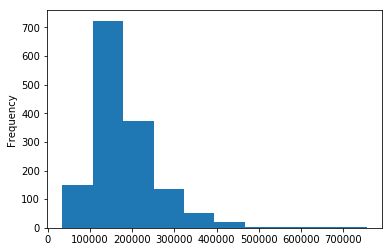

In [7]:
df['SalePrice'].plot.hist();

Looks like a good candidate for log-standardization

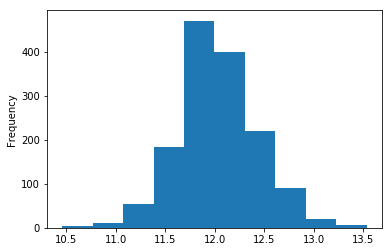

In [8]:
np.log(df['SalePrice']).plot.hist();

In [9]:
df['SalePrice_ln'] = np.log(df['SalePrice'])
df = df.drop(columns=['SalePrice'])

### First Rough Regression

In [14]:
def test_model(df, target='SalePrice_ln', predictors=None, random_state=42):
    y = df[[target]].values
    X = df[predictors].values

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=.2, random_state=random_state
    )

    model = LinearRegression()
    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    RMSE = np.sqrt(mean_squared_error(Y_test, y_pred))
    R2 = r2_score(Y_test, y_pred)

    print(f'RMSE: {round(RMSE, 5)}')
    print(f'R^2:  {round(R2, 5)}')

In [15]:
test_model(df, target='SalePrice_ln', 
           predictors=df.select_dtypes('number').columns.drop('SalePrice_ln'))

RMSE: 0.15187
R^2:  0.87641


### Investigate plots

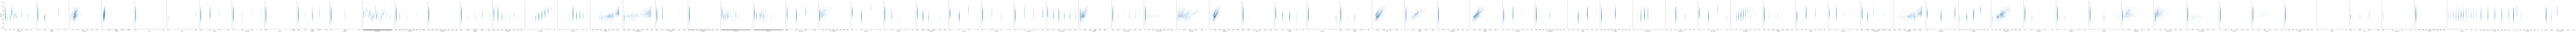

In [16]:
sns.pairplot(data=df, y_vars='SalePrice_ln', x_vars=df.columns.drop('SalePrice_ln'), height=6,
             plot_kws={'alpha': 0.1, 'linewidth':0});

### Handle Outliers

In [17]:
from scipy.stats import normaltest

for col in df.select_dtypes('number').columns.drop('SalePrice_ln'):
    df[f'{col}_outlier'] = False
    stat, p = normaltest(df[col])
    
    if p > 0.05:
        pass
    else:
        # check the log-normed version
        df[f'{col}_log_std'] = np.log(df[col]+0.01)
        stat, p = normaltest(df[f'{col}_log_std'])
        if p > 0.05:
            col = f'{col}_log_std'
            pass
        else:
            continue
        
    print(col, round(stat, 3), round(p, 3), sep='\t')
        
    lower = df[col].quantile(q=0.25)
    upper = df[col].quantile(q=0.75)
    range_ = (upper - lower) * 1.5

    df.loc[(df[col] < lower - range_) | 
           (upper + range_ < df[col]), 
           f'{col}_outlier'] = True

1stFlrSF_log_std	2.894	0.235
GrLivArea_log_std	4.083	0.13
Fireplaces_log_std	1.969	0.374
WoodDeckSF_log_std	2.714	0.257


None of our numeric columns are normally distributed. Only a few are normal after log-standardization.

In [18]:
log_std_cols = [col for col in df if '_log_std' in col]
outlier_cols = [col for col in df if '_outlier' in col]
print('Outliers to replace:', df[outlier_cols].sum().sum())

for col in df:
    if f'{col}_outlier' in df:
        df.loc[df[f'{col}_outlier']==True, col] = df[col].median()
        
df = df.drop(columns=outlier_cols + log_std_cols)

Outliers to replace: 17.0


In [19]:
test_model(df, target='SalePrice_ln', 
           predictors=df.select_dtypes('number').columns.drop('SalePrice_ln'))

RMSE: 0.15187
R^2:  0.87641


No difference!

### Feature Engineering

In [20]:
df['Age'] = df['YrSold'] - df['YearBuilt']

In [21]:
test_model(df, target='SalePrice_ln', 
           predictors=df.select_dtypes('number').columns.drop('SalePrice_ln'))

RMSE: 0.15187
R^2:  0.87641


No difference!

In [22]:
# Dummify 'Neighborhood'
df = df.join(pd.get_dummies(df['Neighborhood']))
df = df.drop(columns=df.columns[-1])

In [27]:
test_model(df, target='SalePrice_ln', 
           predictors=df.select_dtypes('number').columns.drop('SalePrice_ln'))

RMSE: 0.1402
R^2:  0.89467


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data